# Exploratory Data Analysis of ADHD in University Students

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore

## Data Exploration

In [2]:
adhd = pd.read_csv('/home/wells/code/ADHD_EDA/ADHD.csv')
adhd.head()

,age,sex,specify,home_language,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,if_yes_please_list_these_difficulties_and_or_symptoms,if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started,have_you_ever_been_diagnosed_with_a_mental_illness,if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses,was_this_diagnosis_made_before_or_after_you_left_high_school,...,bai1_item_15,bai1_item_16,bai1_item_17,bai1_item_18,bai1_item_19,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change
0,22,female,NaN,xitsonga,no,na,na,no,na,not applicable,...,0,0,3,1,3,1,3,44,44.0,-0.112652
1,21,male,NaN,english,no,none,none,no,none,not applicable,...,0,0,0,0,0,1,0,6,6.0,NaN
2,19,female,NaN,isizulu,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,...,0,0,1,0,0,0,2,28,29.0,NaN
3,20,male,NaN,afrikaans/english,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,...,1,2,1,1,0,1,2,23,23.0,-2.244203
4,20,female,NaN,isixhosa,no,none,none,no,NaN,not applicable,...,0,3,1,1,0,1,0,12,12.0,NaN


In [3]:
print('Dataframe Size:', adhd.size)
print('Rows and Columns:', adhd.shape)

Dataframe Size: 55660
Rows and Columns: (506, 110)


In [4]:
adhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 110 entries, age to aas_change
dtypes: float64(11), int64(83), object(16)
memory usage: 435.0+ KB


In [5]:
adhd.describe()

,age,bdi1_item_1,bdi1_item_2,bdi1_item_3,bdi1_item_4,bdi1_item_5,bdi1_item_6,bdi1_item_7,bdi1_item_8,bdi1_item_9,...,bai1_item_15,bai1_item_16,bai1_item_17,bai1_item_18,bai1_item_19,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,176.000000
mean,18.428854,0.517787,0.478261,0.452569,0.849802,0.719368,0.454545,0.474308,0.992095,0.349802,...,0.715415,0.561265,1.298419,0.764822,0.865613,0.559289,0.790514,21.209486,21.360396,-0.019397
std,0.720202,0.803877,0.752897,0.775059,0.865837,0.837429,0.884917,0.778633,0.927008,0.627876,...,0.988067,0.967390,1.064214,0.994055,1.001842,0.877351,1.024255,12.758829,12.773237,2.260037
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.080996
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,-1.604738
50%,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.000000,0.100503
75%,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,30.000000,30.000000,1.805744
max,22.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,62.000000,62.000000,5.003071


## Data Cleaning

In [6]:
adhd.isnull().sum()

age                                                                                                                                0
sex                                                                                                                                0
specify                                                                                                                          495
home_language                                                                                                                      0
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school      0
                                                                                                                                ... 
bai1_item_20                                                                                                                       0
bai1_item_21                                                         

Percentage of Null:
age                                                                                                                               0.000000
sex                                                                                                                               0.000000
specify                                                                                                                          97.826087
home_language                                                                                                                     0.000000
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school     0.000000
                                                                                                                                   ...    
bai1_item_20                                                                                                                      0.000000
bai1_it

<Axes: >

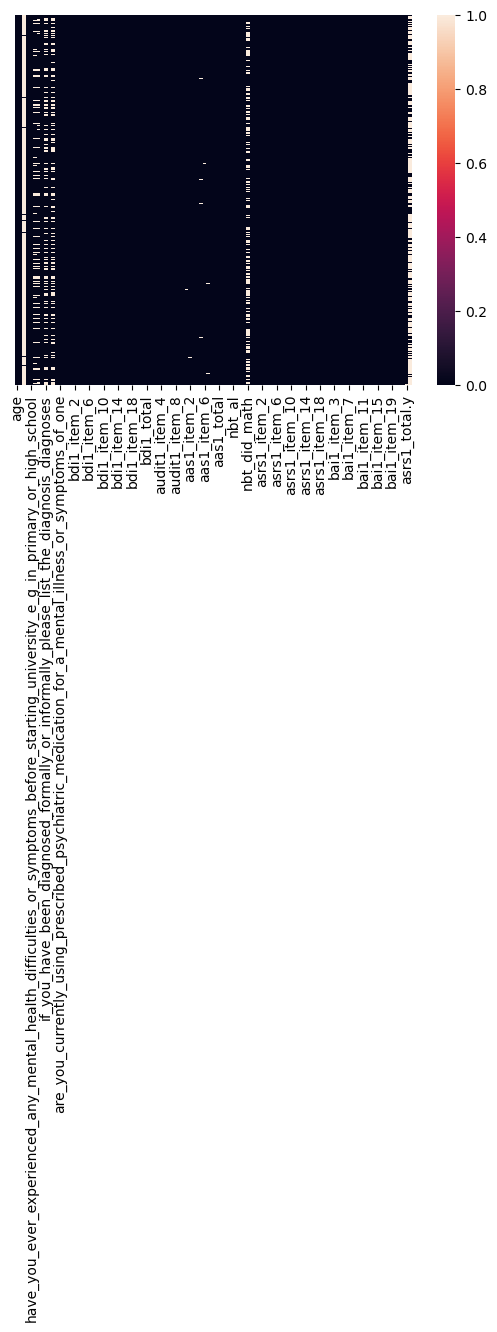

In [7]:
# Determine and Visualize Null Values
null_data = adhd.isnull().sum() / len(adhd) * 100
print("Percentage of Null:")
print(null_data)
sns.heatmap(adhd.isnull(), yticklabels=False)

In [8]:
# Dropping missing values
adhd.dropna(axis=0, inplace=True)
adhd.isnull().any()

age                                                                                                                              False
sex                                                                                                                              False
specify                                                                                                                          False
home_language                                                                                                                    False
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school    False
                                                                                                                                 ...  
bai1_item_20                                                                                                                     False
bai1_item_21                                           

In [9]:
# Determine Duplicates
adhd.duplicated()

196    False
dtype: bool